In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [3]:
train_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)

In [4]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',header=None,skiprows=1)

In [6]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
#Concatenating train and test dataset
df_data=pd.concat([train_data,test_data])

In [8]:
# Renaming the column name as per problem-statement
rename_columns={0:'age',1:'workclass',2:'fnlwgt',3:'education',4:'education-num',5:'marital-status',6:'occupation',7:'relationship',
               8:'race',9:'sex',10:'capital-gain',11:'capital-loss',12:'hours-per-week',13:'native-country',14:'class'}

In [9]:
df_data=df_data.rename(columns=rename_columns)

In [10]:
#Taking sample data from dataset
df_ndata=df_data.sample(n=15000)

In [11]:
#Displaying the top 5 rows data
df_ndata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8949,71,Self-emp-not-inc,137723,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1455,0,3,United-States,<=50K.
18551,44,Private,127592,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
8566,23,Private,33644,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,50,United-States,<=50K.
6817,56,Private,206399,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
10809,56,Private,89698,HS-grad,9,Widowed,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K.


In [12]:
#Displaying the bottom 5 rows data
df_ndata.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
20169,41,Private,171615,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K
1802,39,Local-gov,100011,Assoc-acdm,12,Never-married,Tech-support,Not-in-family,White,Female,0,0,38,United-States,<=50K.
19377,28,Private,196690,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
30744,60,?,174073,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
11989,48,Private,369522,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,60,United-States,<=50K.


In [13]:
#Shape of datarame
df_ndata.shape

(15000, 15)

In [14]:
#Columns of dataset
df_ndata.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [15]:
# Data type information
df_ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 8949 to 11989
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15000 non-null  int64 
 1   workclass       15000 non-null  object
 2   fnlwgt          15000 non-null  int64 
 3   education       15000 non-null  object
 4   education-num   15000 non-null  int64 
 5   marital-status  15000 non-null  object
 6   occupation      15000 non-null  object
 7   relationship    15000 non-null  object
 8   race            15000 non-null  object
 9   sex             15000 non-null  object
 10  capital-gain    15000 non-null  int64 
 11  capital-loss    15000 non-null  int64 
 12  hours-per-week  15000 non-null  int64 
 13  native-country  15000 non-null  object
 14  class           15000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.8+ MB


In [16]:
# Descripton of dataset
df_ndata.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,38.609467,1.885550e+05,10.083733,1075.733267,86.287400,40.470800
std,13.644341,1.049183e+05,2.562569,7477.694813,399.899794,12.184443
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173810e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.774960e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.360585e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,3900.000000,99.000000


In [17]:
df_ndata.describe(include=[object])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,9,16,7,15,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,10506,4859,6939,1912,6096,12846,10009,13477,7585


In [18]:
#Finding unique value in each column
for i in df_ndata:
    
    print(df_ndata[i].unique())
    print('\n')

[71 44 23 56 37 47 36 21 45 48 31 35 50 38 30 54 25 53 52 29 74 46 51 28
 62 18 42 32 20 22 40 41 64 19 61 33 55 34 27 57 63 24 39 17 26 60 67 66
 72 70 59 78 68 81 69 43 76 75 49 73 80 65 58 90 88 77 79 83 82 84 85]


[' Self-emp-not-inc' ' Private' ' Local-gov' ' ?' ' Federal-gov'
 ' Self-emp-inc' ' State-gov' ' Without-pay' ' Never-worked']


[137723 127592  33644 ... 100011 174073 369522]


[' HS-grad' ' Bachelors' ' Assoc-voc' ' Masters' ' 10th' ' Some-college'
 ' 11th' ' 12th' ' Doctorate' ' Prof-school' ' Assoc-acdm' ' 7th-8th'
 ' Preschool' ' 9th' ' 5th-6th' ' 1st-4th']


[ 9 13 11 14  6 10  7  8 16 15 12  4  1  5  3  2]


[' Married-civ-spouse' ' Never-married' ' Widowed' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse']


[' Machine-op-inspct' ' Tech-support' ' Other-service' ' Craft-repair'
 ' Adm-clerical' ' Prof-specialty' ' Handlers-cleaners' ' ?' ' Sales'
 ' Transport-moving' ' Exec-managerial' ' Protective-serv'
 ' Priv-house-serv' ' Farming-fishi

In [19]:
#Removing ? input from column workclass,occupation and native-country 
df_ndata['workclass']=df_ndata['workclass'].replace({' ?':' '})
df_ndata['occupation']=df_ndata['occupation'].replace({' ?':' '})
df_ndata['native-country']=df_ndata['native-country'].replace({' ?':' '})
df_ndata['class']=df_ndata['class'].replace({' <=50K':'<=50K',' >50K':'>50K',' <=50K.':'<=50K',' >50K.':'>50K'})

In [20]:
df_ndata['class'].unique()

array(['<=50K', '>50K'], dtype=object)

# Graph based analysys 

In [21]:
# Seperate numeric and classification feature
df_numer_data=df_ndata[[fea for fea in df_ndata if df_ndata[fea].dtypes!= 'O']]
df_categ_data=df_ndata[[fea for fea in df_ndata if df_ndata[fea].dtypes== 'O']]

In [22]:
df_numer_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
8949,71,137723,9,1455,0,3
18551,44,127592,13,0,0,40
8566,23,33644,13,0,0,50
6817,56,206399,9,0,0,40
10809,56,89698,9,0,0,40


In [23]:
df_categ_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
8949,Self-emp-not-inc,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
18551,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,United-States,<=50K
8566,Private,Bachelors,Never-married,Other-service,Not-in-family,White,Female,United-States,<=50K
6817,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
10809,Private,HS-grad,Widowed,Adm-clerical,Not-in-family,Black,Female,United-States,<=50K


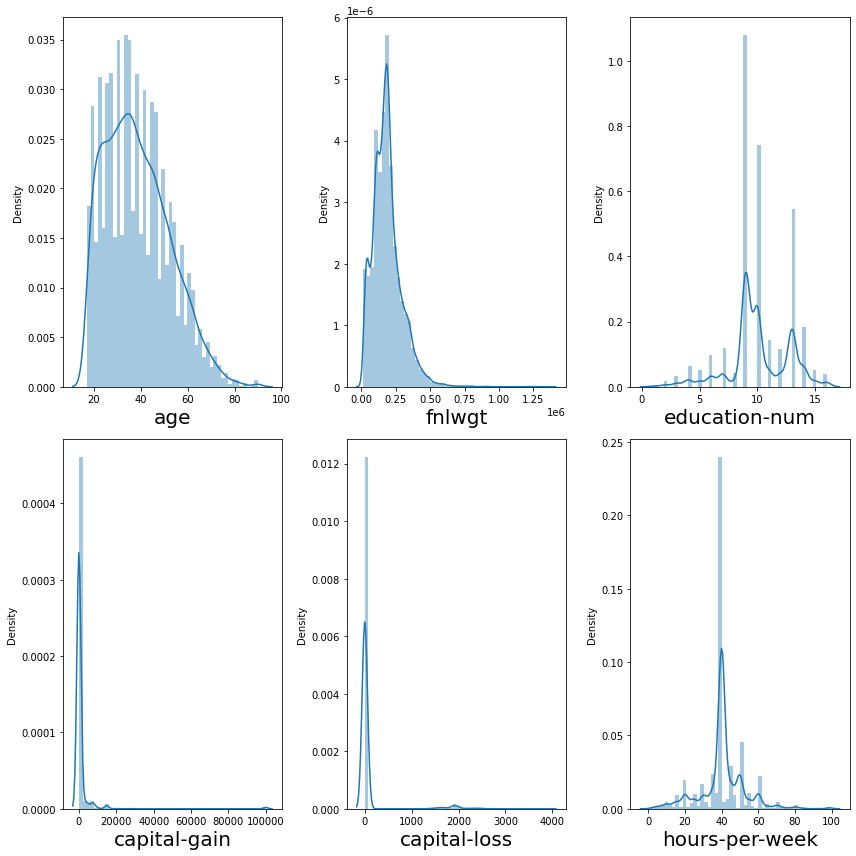

In [24]:
#Numeric data analysys
#Distribution plot 
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in df_numer_data:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df_numer_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    

From above distribution plot one can easily found that data is not normally distributed

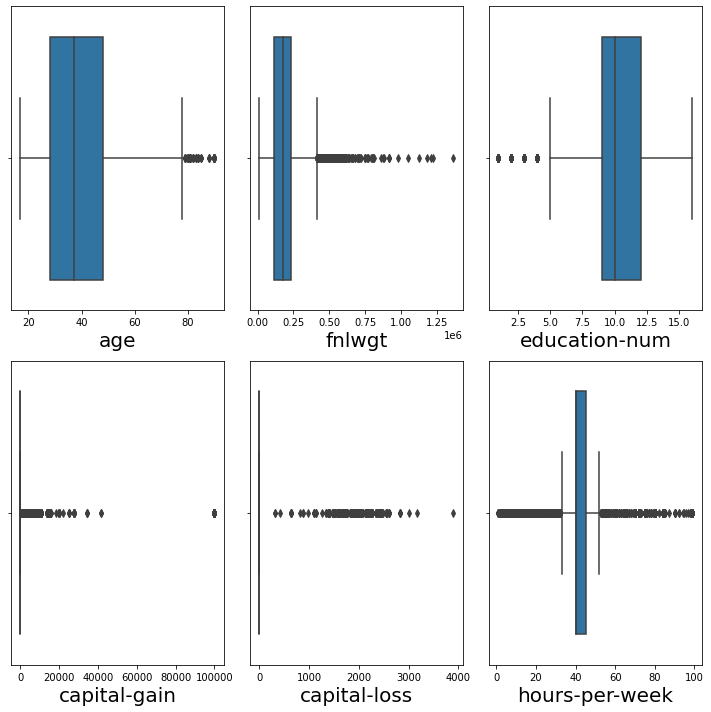

In [25]:
#Box-plot of all numerical features
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df_numer_data:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(df_numer_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    


There are many outliers in numeric data features, we should remove before modeling the data

<AxesSubplot: >

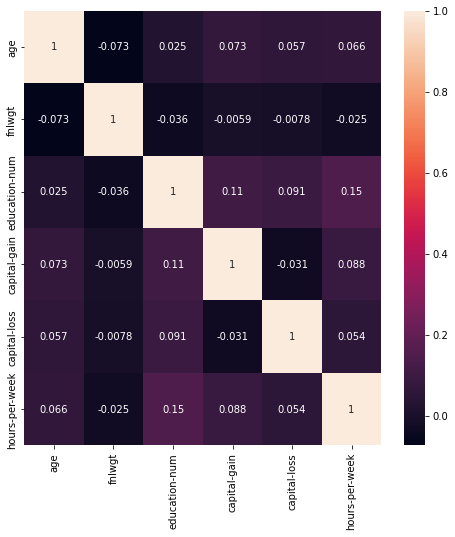

In [26]:
plt.figure(figsize=(8,8),facecolor='white')
sns.heatmap(df_numer_data.corr(),annot=True)

Above heatmap, easily found that numeric features has less relation 

In [27]:
df_numer_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
8949,71,137723,9,1455,0,3
18551,44,127592,13,0,0,40
8566,23,33644,13,0,0,50
6817,56,206399,9,0,0,40
10809,56,89698,9,0,0,40


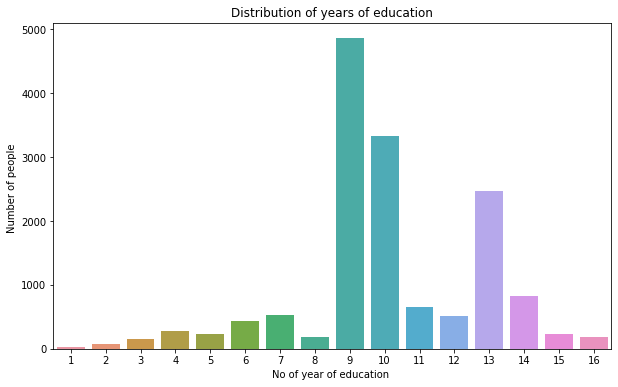

In [28]:
#Creating histogram plot for number of year education
edu_num=df_numer_data['education-num'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(edu_num.index,edu_num.values)
plt.xlabel("No of year of education ")
plt.ylabel("Number of people ")
plt.title("Distribution of years of education")
plt.show()

In [29]:
print(df_numer_data['education-num'].value_counts())

9     4859
10    3336
13    2461
14     826
11     650
7      533
12     519
6      437
4      286
15     233
5      230
8      191
16     183
3      147
2       82
1       27
Name: education-num, dtype: int64


In [30]:
edu_num.index

Int64Index([9, 10, 13, 14, 11, 7, 12, 6, 4, 15, 5, 8, 16, 3, 2, 1], dtype='int64')

In [31]:
# Graph analysis of  categorical feature
df_categ_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
8949,Self-emp-not-inc,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
18551,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,United-States,<=50K
8566,Private,Bachelors,Never-married,Other-service,Not-in-family,White,Female,United-States,<=50K
6817,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
10809,Private,HS-grad,Widowed,Adm-clerical,Not-in-family,Black,Female,United-States,<=50K


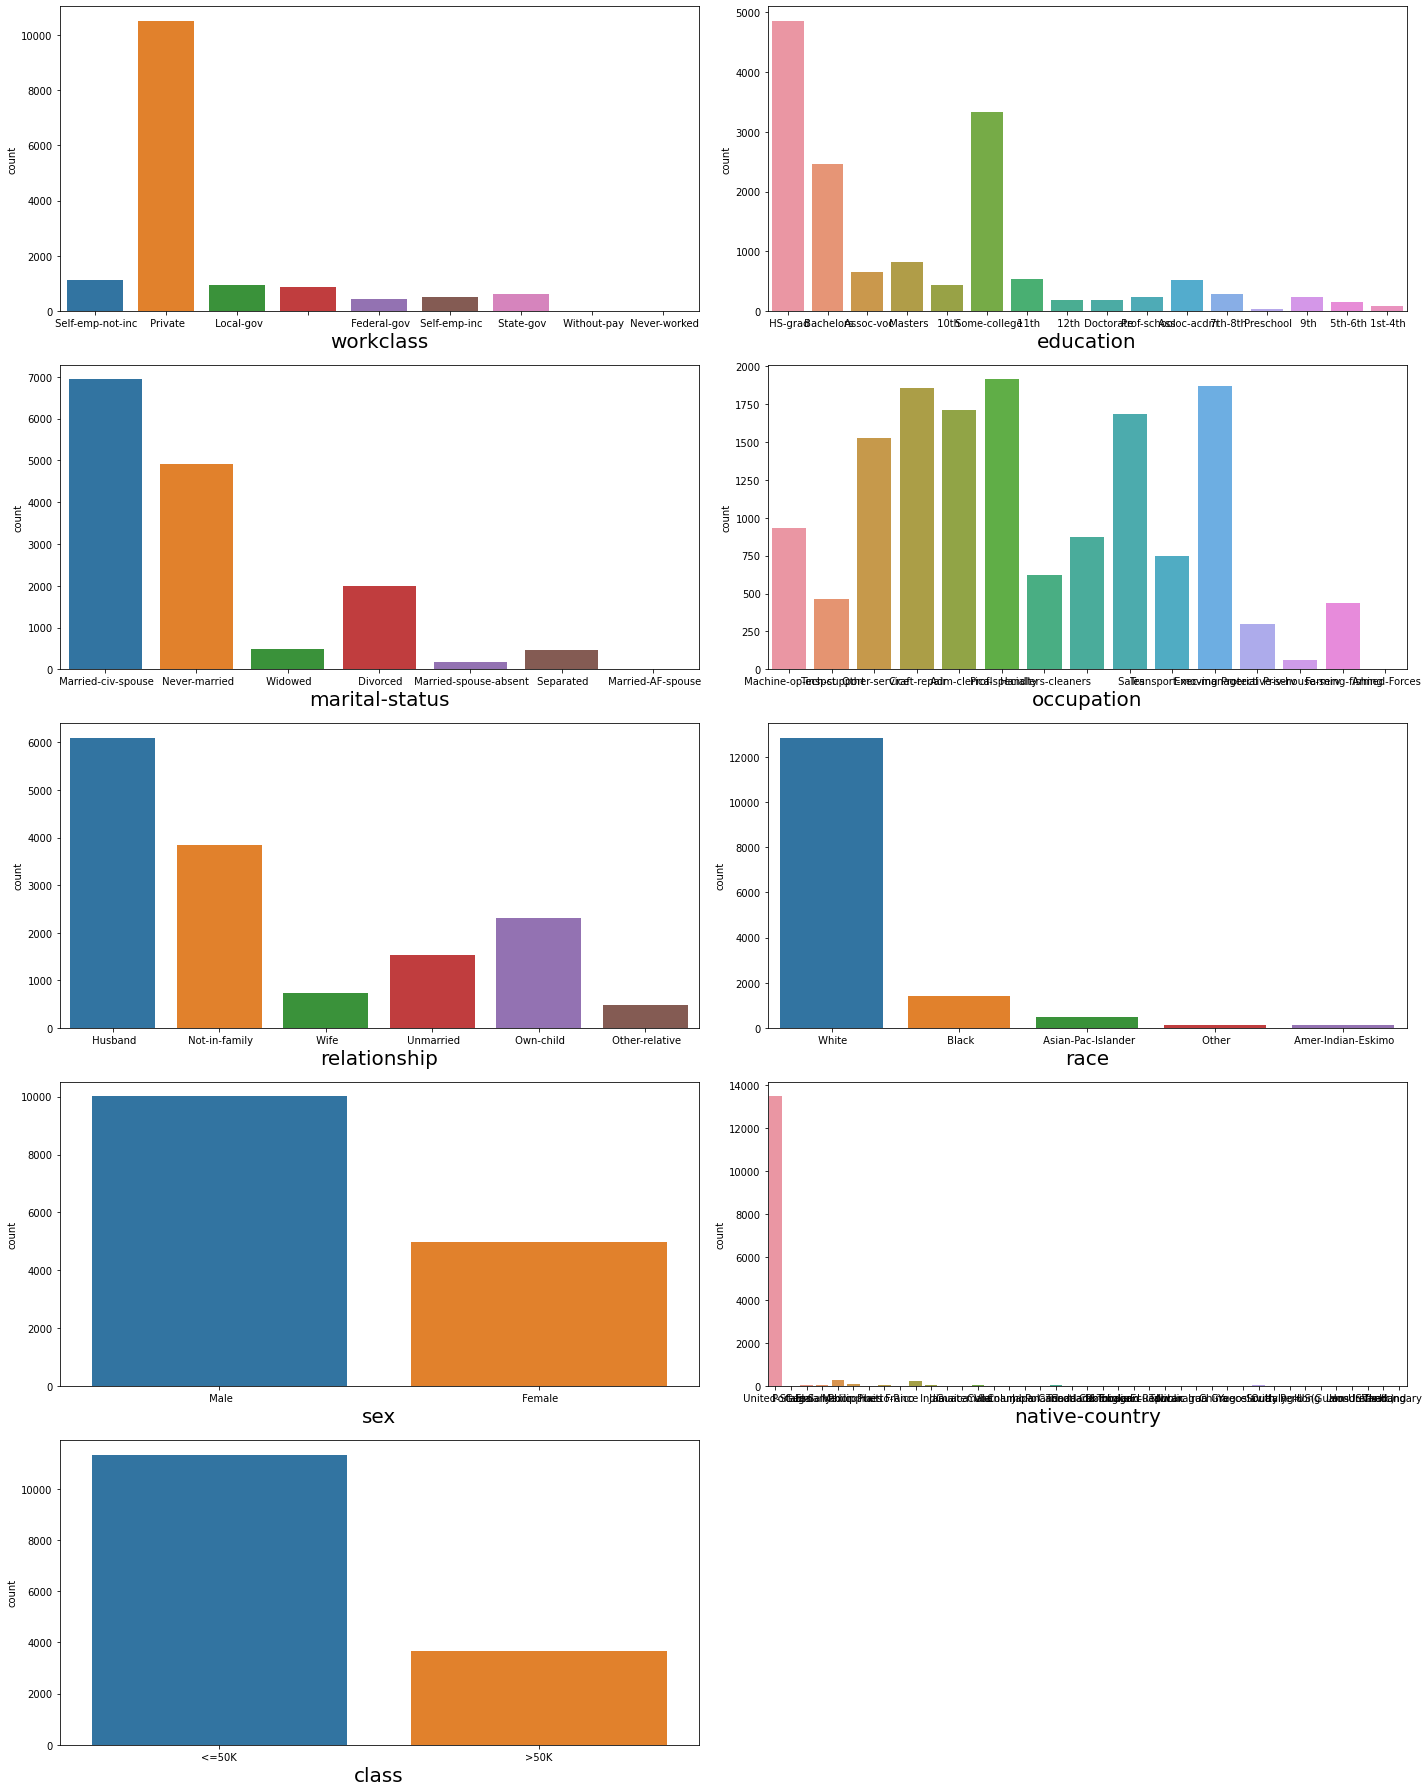

In [32]:
# Count plot of all categorical features
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df_categ_data:
    if plotnumber<=9:
        ax = plt.subplot(5,2,plotnumber)
        sns.countplot(df_categ_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    

# Feature Engineering

In [33]:
# Finding missing values
df_ndata.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

There is no missing value in any features

In [34]:
#Handling outliers using transformation
import scipy.stats as stat

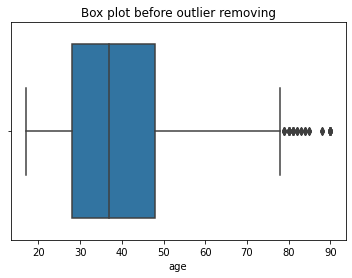

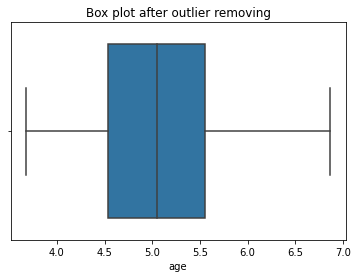

In [35]:
#Box-cox transformation
sns.boxplot(df_ndata['age'])
plt.title('Box plot before outlier removing')
plt.show()
df_ndata['age'],fitted_lambda=stat.boxcox(df_ndata['age'],lmbda=None)
sns.boxplot(df_ndata['age'])
plt.title('Box plot after outlier removing')
plt.show()

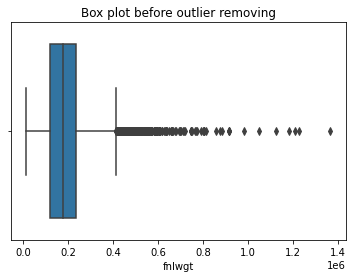

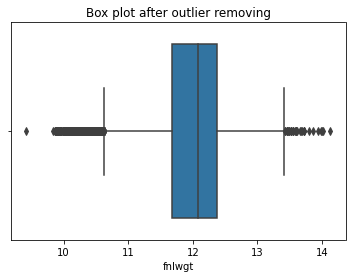

In [36]:
sns.boxplot(df_ndata['fnlwgt'])
plt.title('Box plot before outlier removing')
plt.show()
df_ndata['fnlwgt']=np.log(df_ndata['fnlwgt'])
sns.boxplot(df_ndata['fnlwgt'])
plt.title('Box plot after outlier removing')
plt.show()

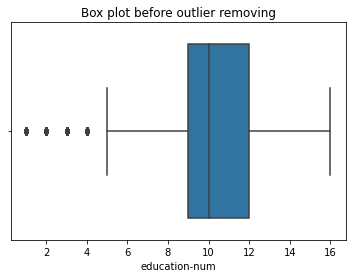

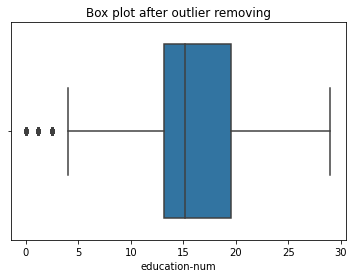

In [37]:
#box-cox transformation
sns.boxplot(df_ndata['education-num'])
plt.title('Box plot before outlier removing')
plt.show()
df_ndata['education-num'],fitted_lambda=stat.boxcox(df_ndata['education-num'],lmbda=None)
sns.boxplot(df_ndata['education-num'])
plt.title('Box plot after outlier removing')
plt.show()

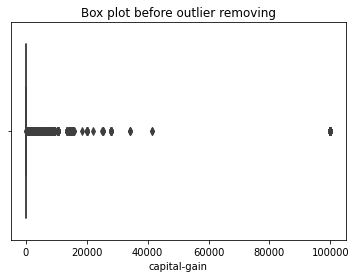

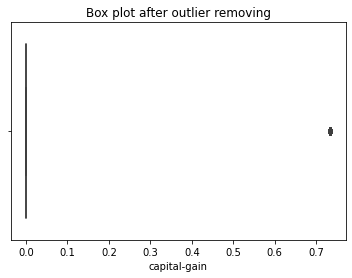

In [38]:
#yeojohnson transformation for capital-gain column
sns.boxplot(df_ndata['capital-gain'])
plt.title('Box plot before outlier removing')
plt.show()
df_ndata['capital-gain'],lmbda=stat.yeojohnson(df_ndata['capital-gain'])
sns.boxplot(df_ndata['capital-gain'])
plt.title('Box plot after outlier removing')
plt.show()

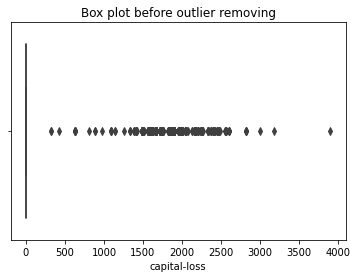

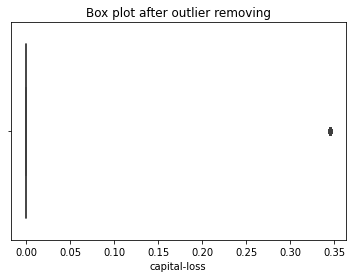

In [39]:
#yeojohnson transformation for capital-loss column
sns.boxplot(df_ndata['capital-loss'])
plt.title('Box plot before outlier removing')
plt.show()
df_ndata['capital-loss'],lmbda=stat.yeojohnson(df_ndata['capital-loss'])
sns.boxplot(df_ndata['capital-loss'])
plt.title('Box plot after outlier removing')
plt.show()

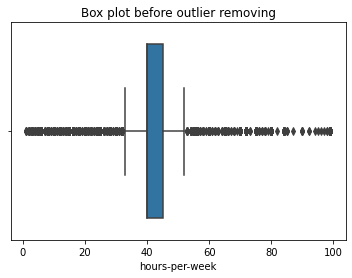

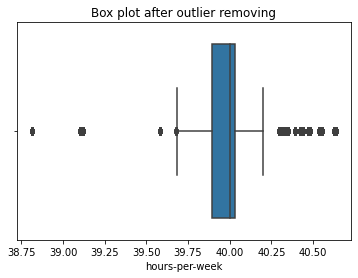

In [40]:
#Mean transform for Ws column
sns.boxplot(df_ndata['hours-per-week'])
plt.title('Box plot before outlier removing')
plt.show()
for i in df_ndata['hours-per-week']:
    q1=df_ndata['hours-per-week'].quantile(0.25)
    q3=df_ndata['hours-per-week'].quantile(0.75)
    iqr=q3-q1
    Lower_tail=q1-(1.5*iqr)
    Upper_tail=q3+(1.5*iqr)
    
    if i>Upper_tail or i<Lower_tail:
        df_ndata['hours-per-week']=df_ndata['hours-per-week'].replace(i,np.mean(df_ndata['hours-per-week']))
        
sns.boxplot(df_ndata['hours-per-week'])
plt.title('Box plot after outlier removing')
plt.show()        

In [41]:
#Label Encoding
df_categ_data.nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    41
class              2
dtype: int64

In [42]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [43]:
df_new=pd.get_dummies(df_ndata,columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])

In [44]:
df_new

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
8949,6.354579,11.833000,13.130331,0.733936,-0.0,40.470800,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18551,5.381532,11.756593,21.852337,-0.000000,-0.0,40.000000,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8566,4.186865,10.423590,21.852337,-0.000000,-0.0,39.725442,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6817,5.861692,12.237566,13.130331,-0.000000,-0.0,40.000000,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10809,5.861692,11.404204,13.130331,-0.000000,-0.0,40.000000,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20169,5.244753,12.053009,19.576519,-0.000000,-0.0,39.862159,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1802,5.148912,11.513035,19.576519,-0.000000,-0.0,39.102165,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
19377,4.534810,12.189384,13.130331,-0.000000,-0.0,40.000000,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30744,6.002857,12.067230,13.130331,-0.000000,-0.0,40.000000,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
#Seperate dependent and independent variable
X=df_new.drop(columns=['class'])
y=df_new['class']

In [46]:
X.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=107)

In [47]:
df_categ_data.nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    41
class              2
dtype: int64

In [48]:
# Handling imbalanced dataset
#Check class distribution
counts = y.value_counts(normalize=True) * 100
print(counts)


<=50K    75.573333
>50K     24.426667
Name: class, dtype: float64


In [49]:
# import Random Sampler
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=42)

In [50]:
ros.fit(X,y)

RandomOverSampler(random_state=42)

In [51]:
X_resampled, y_resampled = ros.fit_resample(X, y)
counts = y_resampled.value_counts(normalize=True) * 100
print(counts)

<=50K    50.0
>50K     50.0
Name: class, dtype: float64


In [52]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.30, random_state=13)

In [53]:
X_train.shape

(15870, 107)

In [54]:
y_train.shape

(15870,)

In [55]:
X_test.shape

(6802, 107)

In [56]:
y_test.shape

(6802,)

In [57]:
#import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [58]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression model

In [59]:
#importing losgistic regression
from sklearn.linear_model import LogisticRegression

In [60]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [61]:
#prediction of test data
y_pred=log_reg.predict(X_test)

In [62]:
y_pred

array(['>50K', '<=50K', '>50K', ..., '>50K', '>50K', '>50K'], dtype=object)

In [63]:
# accuracy_score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [64]:
accuracy

0.8032931490738018

In [65]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test, y_pred)

In [66]:
conf_mat

array([[2634,  780],
       [ 558, 2830]], dtype=int64)

In [67]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [68]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.7715289982425307

In [69]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.825187969924812

In [70]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7974568574023615

# SVC Modeling

In [71]:
#import StandardScaler for Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [72]:
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [73]:
#import SVC
from sklearn.svm import SVC

In [74]:
#Create an SVC model and fit to the training set
clf = SVC()
clf.fit(X_train1, y_train)

SVC()

In [75]:
# Predict on the testing set and evaluate the model
y_pred1 = clf.predict(X_test1)

In [76]:
# Accuracy of  SVC model
accuracy1 = accuracy_score( y_test,y_pred1)
print(accuracy1)

0.8175536606880329


In [77]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat1=confusion_matrix(y_test, y_pred)

In [78]:
conf_mat1

array([[2634,  780],
       [ 558, 2830]], dtype=int64)

In [79]:
true_positive = conf_mat1[0][0]
false_positive = conf_mat1[0][1]
false_negative = conf_mat1[1][0]
true_negative = conf_mat1[1][1]

In [80]:
Precision1 = true_positive/(true_positive+false_positive)
Precision1

0.7715289982425307

In [81]:
Recall1 = true_positive/(true_positive+false_negative)
Recall1

0.825187969924812

In [82]:
F1_Score1 = 2*(Recall1 * Precision1) / (Recall1 + Precision1)
F1_Score1

0.7974568574023615

# SVM kernel

In [83]:
#Create an SVC model and fit to the training set
clf2 = SVC(kernel='rbf')
clf2.fit(X_train, y_train)

SVC()

In [84]:
y2_pred=clf2.predict(X_test)

In [85]:
accuracy2=accuracy_score(y_test,y2_pred)

In [86]:
accuracy2

0.8175536606880329